Statevector([0.70710678+0.j, 0.        +0.j, 0.        +0.j,
             0.70710678+0.j],
            dims=(2, 2))
{'11': 522, '00': 502}


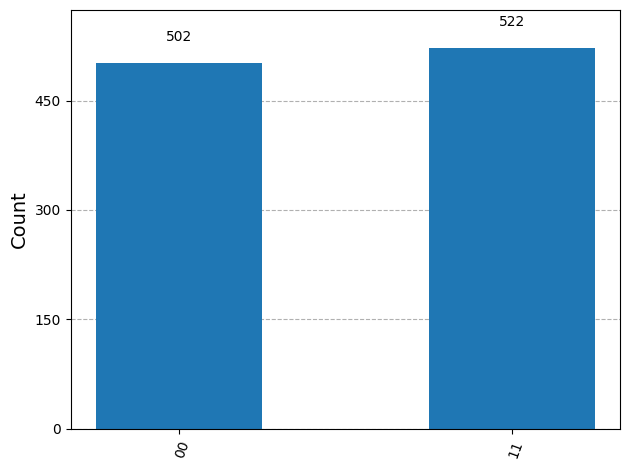

In [16]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

# Create a quantum circuit with 2 qubits and 2 classical bits
qc = QuantumCircuit(2, 2)

# Apply Hadamard gate to qubit 0
qc.h(0)

# Apply CNOT gate with qubit 0 as control and qubit 1 as target
qc.cx(0, 1)

# Take a snapshot for later print
qc.save_statevector()

# Measure the qubits
qc.measure([0, 1], [0, 1])

# Use AerSimulator
simulator = AerSimulator()

# Transpile the circuit for the simulator
compiled_circuit = transpile(qc, simulator)

# Run and get counts
job = simulator.run(compiled_circuit, shots=1024)
result = job.result()
counts = result.get_counts(qc)

# Print statevector
out_state = result.get_statevector()
print(out_state)

# Visualize the results
print(counts)
plot_histogram(counts)